# K-means Clustering and Principal Component Analysis

In [214]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io as sio
%matplotlib inline

## 1 K-means clustering

In [180]:
df = sio.loadmat('ex7data2.mat')
X = df['X']

### 1.1 Find closest centroids

In [181]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

Set $c^{(i)} := j$ that minimizes $||x^{i} - \mu_{j}||^{2}$

In [182]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0]).astype(int)
    
    for i in range(X.shape[0]):
        dmin = 1e6
        for j in range(K):
            d = np.sqrt(np.sum((X[i,:] - centroids[j,:])**2))
            if d < dmin:
                idx[i] = j
                dmin = d
    return idx

In [183]:
# Should be 0, 2, 1 for first 3 examples
idx = findClosestCentroids(X, initial_centroids)
idx[0:3]

array([0, 2, 1])

### 1.2 Compute centroid means

$\mu_{k} := \frac{1}{|C_{k}|} \sum_{i \in C_{k}}x^{(i)}$

In [184]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(m):
        centroids[idx[i],:] += X[i,:]
    for i in range(K):
        centroids[i,:] /= np.sum(idx == i)
    return centroids

In [185]:
# Should be:
# 2.428301, 3.157924
# 5.813503, 2.633656
# 7.119387, 3.616684
computeCentroids(X, idx, K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [189]:
df = sio.loadmat('ex7data2.mat')
X = df['X']
K = 3
initial_centroids = np.array([[3., 3.], [6., 2.], [8., 5.]])
max_iters = 10

In [203]:
def runKmeans(X, initial_centroids, max_iters, plot_progress=False, rand_init=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    if rand_init:
        X = np.random.permutation(X)
        initial_centroids = X[:K]
    centroids = initial_centroids
    previous_centroids = centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        if plot_progress:
            for j in range(K):
                plt.scatter(X[idx==j,0], X[idx==j,1], marker='.')
            plt.plot(centroids[:,0], centroids[:,1], marker='x', 
                        markersize=10, lw=0, color='black', mew=3)
            plt.show()
    return centroids

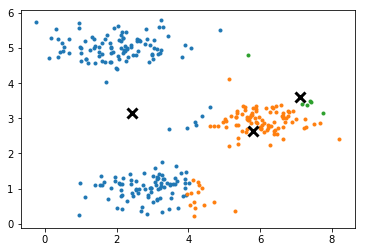

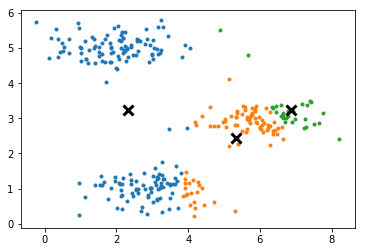

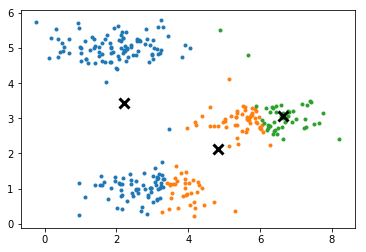

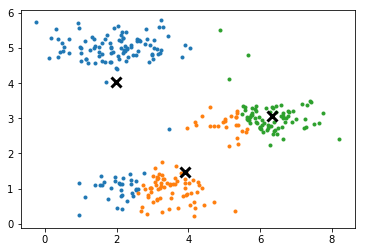

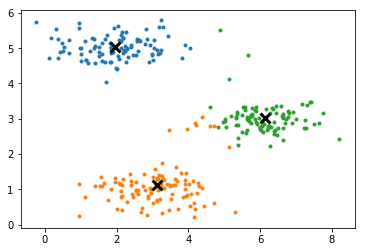

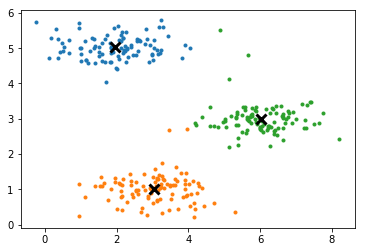

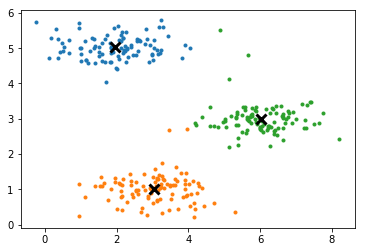

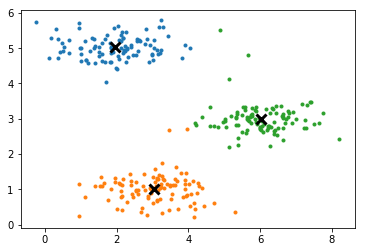

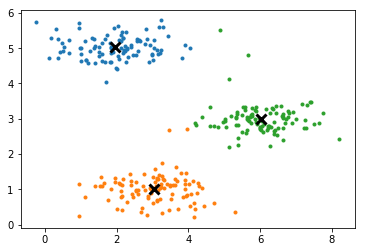

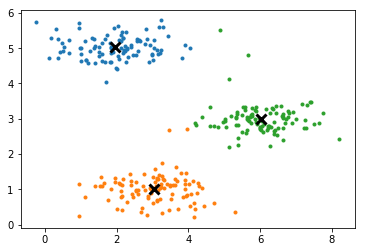

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [204]:
runKmeans(X, initial_centroids, max_iters, True)

### 1.3 Random initialization

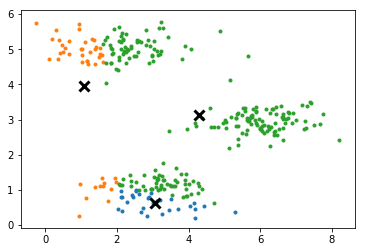

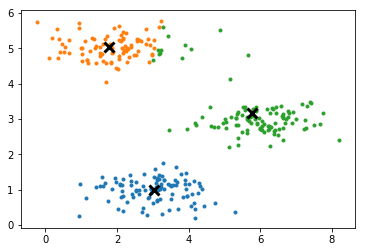

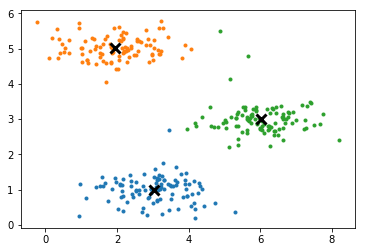

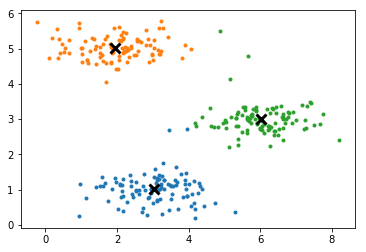

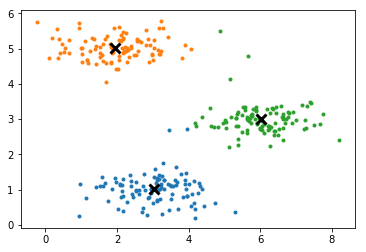

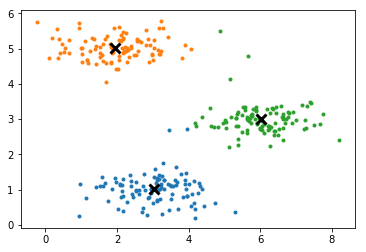

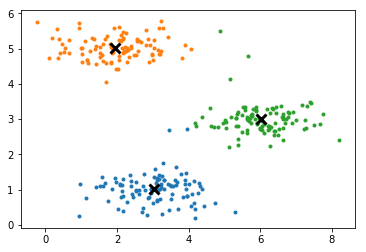

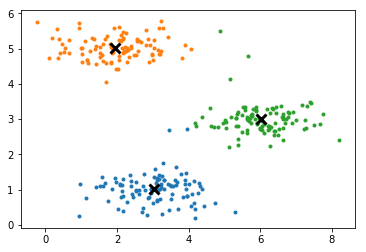

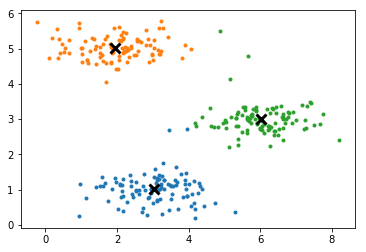

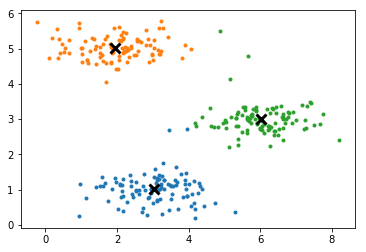

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

In [206]:
runKmeans(X, initial_centroids, max_iters, True, True)

## 1.4 Scikit learn

In [207]:
from sklearn.cluster import KMeans

In [208]:
kmeans = KMeans(n_clusters=K).fit(X)

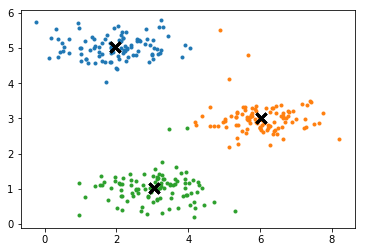

In [219]:
for j in range(K):
    plt.scatter(X[kmeans.labels_==j,0], X[kmeans.labels_==j,1], marker='.')
    plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', 
             markersize=10, lw=0, color='black', mew=3)
plt.show()

In [220]:
kmeans.cluster_centers_

array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

## 2 Principal component analysis
TODO